In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
etf_price  = pd.read_csv('data_directory/etf_price.csv', header=[0,1], index_col=0)
stock_price = pd.read_csv('data_directory/stock_price.csv', header=[0,1], index_col=0)

etf_price.index = list(map(str, etf_price.index))
stock_price.index = list(map(str, stock_price.index))

In [18]:
first_col = []
second_col = []

for col in stock_price.columns:
    first_col.append(col[1])
    second_col.append(col[0])

stock_price.columns = [first_col,second_col]


In [ ]:

oci = stock_price['A010060'].copy()

In [19]:
oci['ema130'] = oci['closing_price'].ewm(span=130).mean()

In [20]:
oci = oci.iloc[130:]

balance = pd.DataFrame(columns = ['cash','stock','total'], index = oci.index)

buying = False

buy_date = []
sell_date = []

balance.loc[balance.index[0], 'cash'] = 500000
balance.loc[balance.index[0], 'stock'] = 0
balance.loc[balance.index[0], 'total'] = 500000


balance.loc[balance.index[1], 'cash'] = 500000
balance.loc[balance.index[1], 'stock'] = 0
balance.loc[balance.index[1], 'total'] = 500000


for i in range(2, len(oci.closing_price)):
    if buying == False:
        if oci.ema130.values[i-2] < oci.ema130.values[i-1]:
            buying = True
            number = balance.loc[balance.index[i-1], 'cash'] // oci.loc[oci.index[i], 'market_price']
            balance.loc[balance.index[i], 'stock'] = oci.loc[oci.index[i], 'market_price'] * number
            balance.loc[balance.index[i], 'cash'] = balance.loc[balance.index[i-1], 'cash'] - balance.loc[balance.index[i], 'stock']
        else:
            balance.loc[balance.index[i], 'stock'] = 0
            balance.loc[balance.index[i], 'cash'] = balance.loc[balance.index[i-1], 'cash']
    else:
        if oci.ema130.values[i-2] > oci.ema130.values[i-1]:
            buying = False
            balance.loc[balance.index[i], 'stock'] = 0
            balance.loc[balance.index[i], 'cash'] = balance.loc[balance.index[i-1], 'stock'] + balance.loc[balance.index[i-1], 'cash']
        else:
            balance.loc[balance.index[i],'stock'] = oci.loc[oci.index[i], 'market_price'] * number
            balance.loc[balance.index[i], 'cash'] = balance.loc[balance.index[i-1], 'cash']

    balance.loc[balance.index[i], 'total'] = balance.loc[balance.index[i], 'stock'] + balance.loc[balance.index[i], 'cash']


balance['rate_of_return'] = balance['total'] / 500000

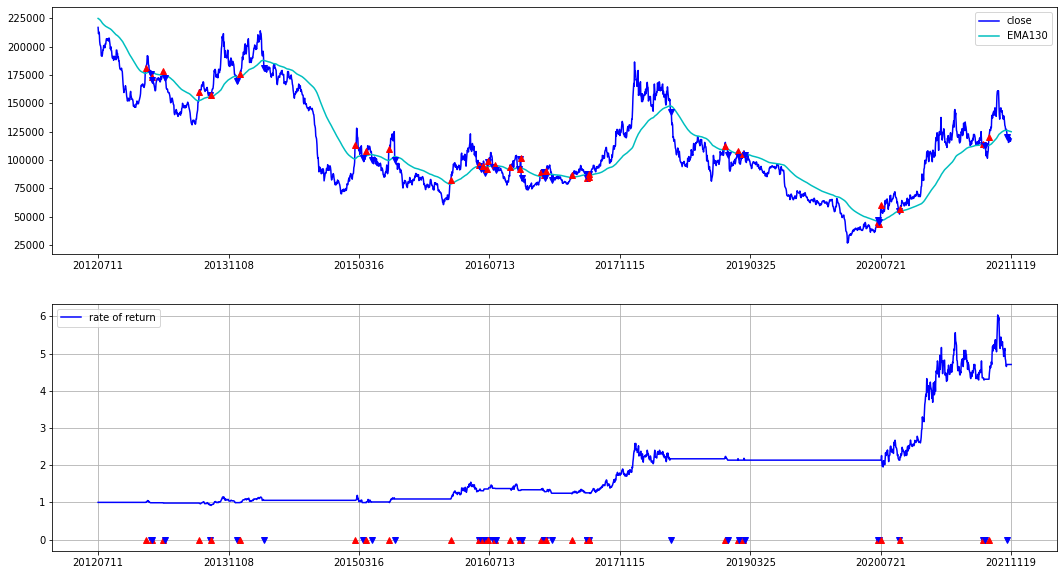

In [21]:
plt.figure(figsize=(18,10))
plt.subplot(2,1,1)
plt.plot(oci.index, oci['closing_price'], color='#0000ff', label='close')
plt.plot(oci.index, oci['ema130'], color='c', label='EMA130')
buying = False
for i in range(2,len(oci.closing_price)):
    if oci.ema130.values[i-2] < oci.ema130.values[i-1] and buying == False:
        buying = True
        plt.plot(oci.index.values[i], oci.closing_price.values[i], 'r^')
    elif oci.ema130.values[i-2] > oci.ema130.values[i-1] and buying == True:
        buying = False
        plt.plot(oci.index.values[i], oci.closing_price.values[i], 'bv')
plt.xticks([oci.index[i] for i in range(0,len(oci.index),len(oci.index)//7)])
plt.legend()

plt.subplot(2,1,2)
plt.plot(oci.index, balance['rate_of_return'], color='b', label='rate of return')
buying = False
for i in range(2,len(oci.closing_price)-2):
    if oci.ema130.values[i-2] < oci.ema130.values[i-1] and buying == False:
        buying = True
        plt.plot(oci.index.values[i], 0, 'r^')
    elif oci.ema130.values[i-2] > oci.ema130.values[i-1] and buying == True:
        buying = False
        plt.plot(oci.index.values[i], 0, 'bv')
plt.xticks([oci.index[i] for i in range(0,len(oci.index),len(oci.index)//7)])
plt.legend()
plt.grid(True)
plt.show()

In [14]:
oci.iloc[130:]

,market_price,high_price,low_price,closing_price,trading_volume,foreign,ema130
20120711,218000,219500,216500,217000,131803,23.2205,224930.927646
20120712,219000,219000,211500,211500,138574,23.2954,224694.901817
20120713,211500,215000,205500,213000,197685,23.3432,224489.856566
20120716,214500,216500,211000,212000,115457,23.2695,224271.368501
20120717,199500,205500,199000,204500,543779,22.7390,223926.271406
...,...,...,...,...,...,...,...
20211115,121000,121500,115000,118500,360389,19.6800,125346.713208
20211116,119500,123000,118000,120000,246009,19.7600,125265.083999
20211117,120500,120500,116000,116500,270714,19.5500,125131.265922
20211118,116000,119500,115000,118000,156529,19.6000,125022.391633


In [29]:
def ema130(price_df, buy_std, sell_std):
    price_df['ema130'] = price_df['closing_price'].ewm(span=130).mean()
    price_df = price_df.iloc[130:]
    balance = pd.DataFrame(columns = ['cash','stock','total'], index = price_df.index)
    buying = False
    balance.loc[balance.index[0], 'cash'] = 500000
    balance.loc[balance.index[0], 'stock'] = 0
    balance.loc[balance.index[0], 'total'] = 500000
    balance.loc[balance.index[1], 'cash'] = 500000
    balance.loc[balance.index[1], 'stock'] = 0
    balance.loc[balance.index[1], 'total'] = 500000
    for i in range(2, len(price_df.closing_price)):
        if buying == False:
            if (price_df.ema130.values[i-1] - price_df.ema130.values[i-2]) / price_df.ema130.values[i-2] > buy_std  and price_df.loc[price_df.index[i],'market_price'] != 0:
                buying = True
                number = balance.loc[balance.index[i-1], 'cash'] // price_df.loc[price_df.index[i], 'market_price']
                balance.loc[balance.index[i], 'stock'] = price_df.loc[price_df.index[i], 'market_price'] * number
                balance.loc[balance.index[i], 'cash'] = balance.loc[balance.index[i-1], 'cash'] - balance.loc[balance.index[i], 'stock']
            else:
                balance.loc[balance.index[i], 'stock'] = 0
                balance.loc[balance.index[i], 'cash'] = balance.loc[balance.index[i-1], 'cash']
        else:
            if (price_df.ema130.values[i-1] - price_df.ema130.values[i-2]) / price_df.ema130.values[i-2] < sell_std:
                buying = False
                balance.loc[balance.index[i], 'stock'] = 0
                balance.loc[balance.index[i], 'cash'] = balance.loc[balance.index[i-1], 'stock'] + balance.loc[balance.index[i-1], 'cash']
            else:
                balance.loc[balance.index[i],'stock'] = price_df.loc[price_df.index[i], 'market_price'] * number
                balance.loc[balance.index[i], 'cash'] = balance.loc[balance.index[i-1], 'cash']

        balance.loc[balance.index[i], 'total'] = balance.loc[balance.index[i], 'stock'] + balance.loc[balance.index[i], 'cash']


    balance['rate_of_return'] = balance['total'] / 500000


    plt.figure(figsize=(18,10))
    plt.subplot(2,1,1)
    plt.plot(price_df.index, price_df['closing_price'], color='#0000ff', label='close')
    plt.plot(price_df.index, price_df['ema130'], color='c', label='EMA130')
    buying = False
    for i in range(2,len(price_df.closing_price)):
        if (price_df.ema130.values[i-1] - price_df.ema130.values[i-2]) / price_df.ema130.values[i-2] > buy_std  and price_df.loc[price_df.index[i],'market_price'] != 0 and buying == False:
            buying = True
            plt.plot(price_df.index.values[i], price_df.closing_price.values[i], 'r^')
        elif (price_df.ema130.values[i-1] - price_df.ema130.values[i-2]) / price_df.ema130.values[i-2] < sell_std and buying == True:
            buying = False
            plt.plot(price_df.index.values[i], price_df.closing_price.values[i], 'bv')
    plt.xticks([price_df.index[i] for i in range(0,len(price_df.index),len(price_df.index)//7)])
    plt.legend()

    plt.subplot(2,1,2)
    plt.plot(price_df.index, balance['rate_of_return'], color='b', label='rate of return')
    buying = False
    for i in range(2,len(price_df.closing_price)-2):
        if (price_df.ema130.values[i-1] - price_df.ema130.values[i-2]) / price_df.ema130.values[i-2] > buy_std  and price_df.loc[price_df.index[i],'market_price'] != 0 and buying == False:
            buying = True
            plt.plot(price_df.index.values[i], 0, 'r^')
        elif (price_df.ema130.values[i-1] - price_df.ema130.values[i-2]) / price_df.ema130.values[i-2] < sell_std and buying == True:
            buying = False
            plt.plot(price_df.index.values[i], 0, 'bv')
    plt.xticks([price_df.index[i] for i in range(0,len(oci.index),len(oci.index)//7)])
    plt.legend()
    plt.grid(True)
    plt.show()

    return balance

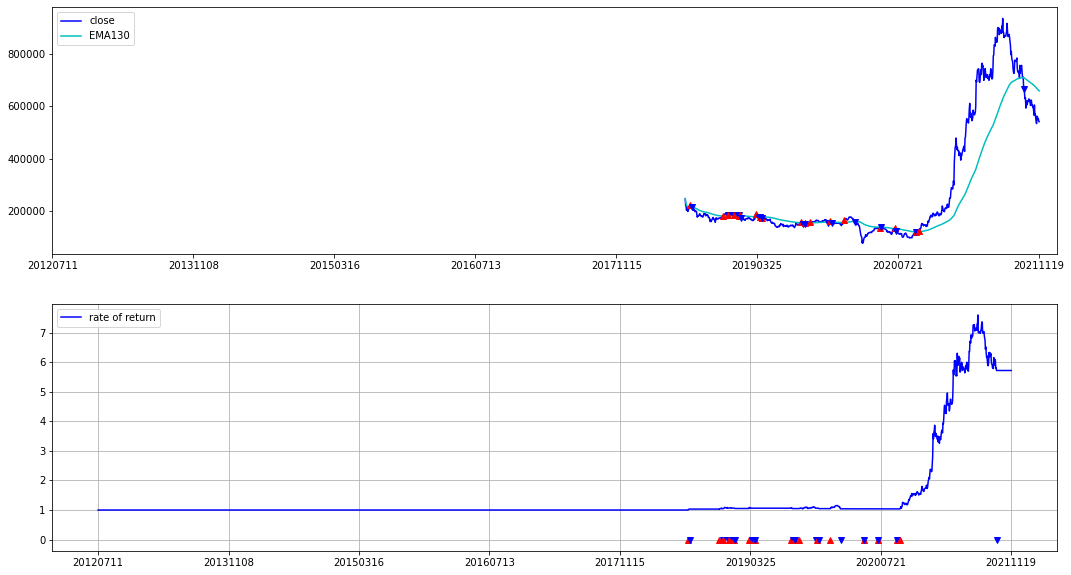

,cash,stock,total,rate_of_return
20120711,500000,0,500000,1.0
20120712,500000,0,500000,1.0
20120713,500000,0,500000,1.0
20120716,500000,0,500000,1.0
20120717,500000,0,500000,1.0
...,...,...,...,...
20211115,2861000.0,0,2861000.0,5.722
20211116,2861000.0,0,2861000.0,5.722
20211117,2861000.0,0,2861000.0,5.722
20211118,2861000.0,0,2861000.0,5.722


In [47]:
ema130(stock_price['A298020'].copy(), 0, 0)

In [48]:
def buy_signal(i):
    return oci.ema130.values[i-2] < oci.ema130.values[i-1] and oci.slow_d.values[i-2] >= 20 and oci.slow_d.values[i-1] < 20 and oci.high_price.values[i] > oci.high_price.values[i-1]

def sell_signal(i):
    return oci.ema130.values[i-2] > oci.ema130.values[i-1] and oci.slow_d.values[i-2] <= 80 and oci.slow_d.values[i-1] > 80
    

In [49]:
balance = pd.DataFrame(columns = ['cash','stock','total'], index = oci.index)

buying = False

buy_date = []
sell_date = []

balance.loc[balance.index[0], 'cash'] = 500000
balance.loc[balance.index[0], 'stock'] = 0
balance.loc[balance.index[0], 'total'] = 500000

balance.loc[balance.index[1], 'cash'] = 500000
balance.loc[balance.index[1], 'stock'] = 0
balance.loc[balance.index[1], 'total'] = 500000


for i in range(2, len(oci.closing_price)):
    if buying == False:
        if buy_signal(i):
            buying = True
            number = balance.loc[balance.index[i-1], 'cash'] // oci.loc[oci.index[i], 'closing_price']
            balance.loc[balance.index[i], 'stock'] = oci.loc[oci.index[i], 'closing_price'] * number
            balance.loc[balance.index[i], 'cash'] = balance.loc[balance.index[i-1], 'cash'] - balance.loc[balance.index[i], 'stock']
        else:
            balance.loc[balance.index[i], 'stock'] = 0
            balance.loc[balance.index[i], 'cash'] = balance.loc[balance.index[i-1], 'cash']
    else:
        if sell_signal(i):
            buying = False
            balance.loc[balance.index[i], 'stock'] = 0
            balance.loc[balance.index[i], 'cash'] = balance.loc[balance.index[i-1], 'stock'] + balance.loc[balance.index[i-1], 'cash']
        else:
            balance.loc[balance.index[i],'stock'] = oci.loc[oci.index[i], 'closing_price'] * number
            balance.loc[balance.index[i], 'cash'] = balance.loc[balance.index[i-1], 'cash']

    balance.loc[balance.index[i], 'total'] = balance.loc[balance.index[i], 'stock'] + balance.loc[balance.index[i], 'cash']


balance['rate_of_return'] = balance['total'] / 500000

AttributeError: 'DataFrame' object has no attribute 'slow_d'

In [ ]:
plt.figure(figsize=(18,10))
plt.subplot(3,1,1)
plt.plot(oci.index, oci['closing_price'], color='#0000ff', label='close')
plt.plot(oci.index, oci['ema130'], color='c', label='EMA130')
buying = False
for i in range(1,len(oci.closing_price)):
    if buy_signal(i) and buying == False:
        buying = True
        plt.plot(oci.index.values[i], oci.closing_price.values[i], 'r^')
    elif sell_signal(i) and buying == True:
        buying = False
        plt.plot(oci.index.values[i], oci.closing_price.values[i], 'bv')
plt.xticks([oci.index[i] for i in range(0,len(oci.index),len(oci.index)//7)])
plt.legend()


plt.subplot(3,1,2)
plt.grid(True)
plt.plot(oci.index, oci['slow_d'], color='k', label='%D')
buying = False
for i in range(1,len(oci.closing_price)-2):
    if buy_signal(i) and buying == False:
        buying = True
        plt.plot(oci.index.values[i], oci.slow_d.values[i], 'r^')
    elif sell_signal(i) and buying == True:
        buying = False
        plt.plot(oci.index.values[i], oci.slow_d.values[i], 'bv')
plt.xticks([oci.index[i] for i in range(0,len(oci.index),len(oci.index)//7)])
plt.legend()

plt.subplot(3,1,3)
plt.plot(oci.index, balance['rate_of_return'], color='b', label='rate of return')
buying = False
for i in range(1,len(oci.closing_price)-2):
    if buy_signal(i) and buying == False:
        buying = True
        plt.plot(oci.index.values[i], 0, 'r^')
    elif sell_signal(i) and buying == True:
        buying = False
        plt.plot(oci.index.values[i], 0, 'bv')
plt.xticks([oci.index[i] for i in range(0,len(oci.index),len(oci.index)//7)])
plt.legend()
plt.grid(True)
plt.show()